# Projeto 2 - Ciência dos dados

### Integrantes do grupo: 
    - João Victor Pazotti
    - Rafael Alves Madarás
    - Pedro Mahfuz
    - Filippo Ferraro
### Turma:
    2 - A

## Proposta do projeto

No **Projeto 2** de **Ciência dos Dados**, tivemos o desafio de prever uma variável em função de demais outras variáveis que podem influenciar em seu comportamento. Assim, escolhemos estudar e prever a **_expectatica de vida_** de um país em função de índices de felicidade, corrupção, liberdade e PIB per capita. 
Para isso, pesquisamos Datasets e decidimos que os mais adequados seriam os seguintes:

    1) A felicidade mundial , que nos trouxe os dados mostrados no DataFrame "f_2015_". (link: https://www.kaggle.com/unsdsn/world-happiness)
    
    
    2) Os índices de corrupção, que dos trouxe os dados mostrados no DataFrame "co" (link: https://www.kaggle.com/transparencyint/corruption-index)

---

## _1. Importando Datasets e bibliotecas utiizadas no projeto_

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns; 
from scipy import stats
from math import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [22]:
# importa Datasets usados no código

# transforma tabela csv em DataFrame do Pandas 
f_2015_ = pd.read_csv("2015.csv")

# transforma tabela csv em DataFrame do Pandas 
co = pd.read_csv("index.csv")

### _1.1. Significado de cada coluna do DataFrame_ 
    
    Country = País
    Happiness Rank = Ranking de felicidade
    Happiness Score = Pontuação de felicidade
    GDP per Capita = PIB per capita
    Life Expectancy = Expectativa de vida
    Freedom = Liberdade
    Government Corruption (Trust) = Corrupção governamental (Confiança)
    Corruption Perceptions Index (CPI) = Índice de percepção de corrupção (IPC)

---

## _2. Filtrando e reorganizando os DataFrame_

Para que pudessemos deixar os DataFrames mais "limpos", apenas com as colunas que realmente serão relevantes para a realização do projeto, ambos foram filtrados. Além disso, alteramos o nome de algumas colunas para que facilite sua compreensão.

In [23]:
# muda nomes da tabela e filtra colunas irrelevantes
f_2015_.columns=["Country","Region","Happiness Rank","Happiness Score","Standard Error","GDP per Capita","Family",
                 "Life Expectancy","Freedom","Government Corruption (Trust)","Generosity","Dystopia Residual"]

nova = f_2015_.drop(columns=["Region","Standard Error","Family","Generosity","Dystopia Residual"])

# printa tabela_nova
nova

,Country,Happiness Rank,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption (Trust)
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957
...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.42864,0.59201,0.55191
154,Benin,155,3.340,0.28665,0.31910,0.48450,0.08010
155,Syria,156,3.006,0.66320,0.72193,0.15684,0.18906
156,Burundi,157,2.905,0.01530,0.22396,0.11850,0.10062


In [24]:
# filtra colunas irrelevantes
corrupcao = co.loc[:,["Country","Corruption Perceptions Index (CPI)"]]

# printa corrupcao
corrupcao

,Country,Corruption Perceptions Index (CPI)
0,New Zealand,90
1,Denmark,90
2,Finland,89
3,Sweden,88
4,Switzerland,86
...,...,...
171,Sudan,14
172,Syria,13
173,Korea (North),12
174,South Sudan,11


In [25]:
# junta os DataFrames tabela_nova e corrupcao
tabela_completa = pd.merge(nova,corrupcao,on="Country")
tabela_completa

,Country,Happiness Rank,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption (Trust),Corruption Perceptions Index (CPI)
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,86
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,78
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,90
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,85
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,82
...,...,...,...,...,...,...,...,...
143,Rwanda,154,3.465,0.22208,0.42864,0.59201,0.55191,54
144,Benin,155,3.340,0.28665,0.31910,0.48450,0.08010,36
145,Syria,156,3.006,0.66320,0.72193,0.15684,0.18906,13
146,Burundi,157,2.905,0.01530,0.22396,0.11850,0.10062,20


---

## _3. Análise exploratória_

Após realizar os filtros e reorganizações, fizemos a análise exploratória do DataFrame. Ela foi dividida de modo que as análises gerais fossem abordadas, assim como as análises de cada coluna. Como o foco do projeto é prever a expectativa de vida, focamos na relação de cada coluna do DataFrame com os dados sobre expectativa de vida.

### _3.1. Dados gerais_

In [26]:
# estatisticas descritivas sobre o DataFrame principal
tabela_completa.describe()

,Happiness Rank,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Government Corruption (Trust),Corruption Perceptions Index (CPI)
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,78.574324,5.397034,0.853249,0.637566,0.431699,0.143891,43.432432
std,46.015834,1.153823,0.399911,0.238391,0.152869,0.121347,19.572701
min,1.000000,2.839000,0.015300,0.000000,0.000000,0.000000,13.000000
25%,38.750000,4.542000,0.546262,0.478648,0.328630,0.061067,29.750000
50%,77.500000,5.277000,0.919550,0.697535,0.438215,0.106480,38.000000
75%,118.250000,6.295750,1.155523,0.809837,0.555402,0.182365,55.500000
max,158.000000,7.587000,1.690420,1.025250,0.669730,0.551910,90.000000


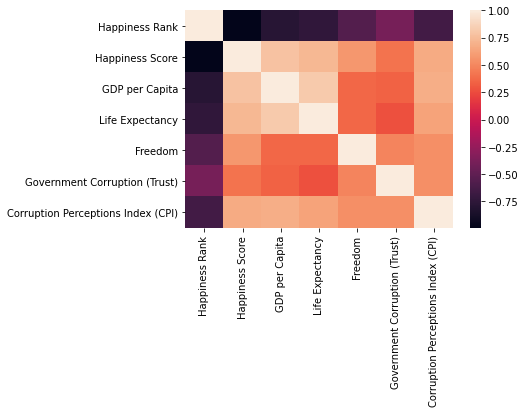

In [27]:
# Correlação entre todas as colunas da tabela
correlacao = tabela_completa.corr()

# mapa de calor da correlação geral da tabela
sns.heatmap(correlacao);

### _3.2. Ranking de felicidade_

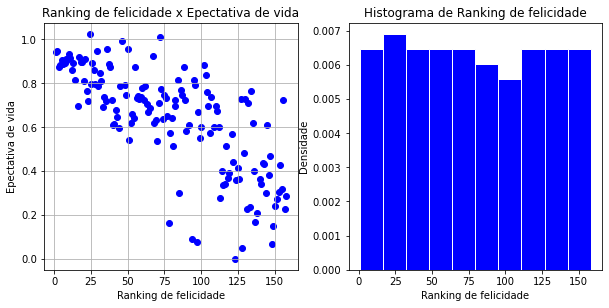

A covariância entre Ranking de felicidade e Expectativa de vida é: -8.0829
A correlação entre Ranking de felicidade e Expectativa de vida é: -0.7368


In [28]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Ranking de felicidade X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Happiness Rank"],tabela_completa["Life Expectancy"],color="blue")
plt.grid(True)
plt.xlabel("Ranking de felicidade")
plt.ylabel("Epectativa de vida")
plt.title("Ranking de felicidade x Epectativa de vida")

# Hisograma Ranking de felicidade
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Happiness Rank"], density=True, edgecolor="white",color="blue");
plt.xlabel("Ranking de felicidade")
plt.ylabel("Densidade")
plt.title("Histograma de Ranking de felicidade");

plt.show()

# Correlação e covariância entre Ranking de felicidade e Epectativa de vida
cor_R = tabela_completa["Life Expectancy"].corr(tabela_completa["Happiness Rank"])
cov_R = tabela_completa["Life Expectancy"].cov(tabela_completa["Happiness Rank"])

print("A covariância entre Ranking de felicidade e Expectativa de vida é: {0}".format(round(cov_R,4)))
print("A correlação entre Ranking de felicidade e Expectativa de vida é: {0}".format(round(cor_R,4)))

### _3.3. Pontuação de felicidade_

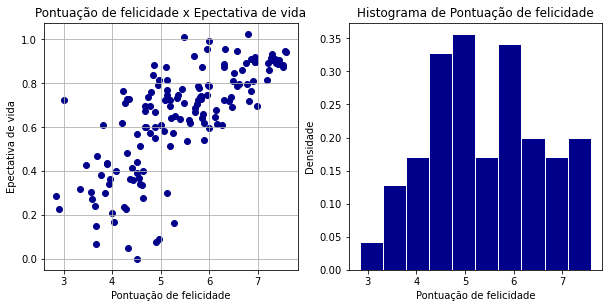

A covariância entre Pontuação de felicidade e Expectativa de vida é: 0.2002
A correlação entre Pontuação de felicidade e Expectativa de vida é: 0.7279


In [29]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Pontuação de felicidade X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Happiness Score"],tabela_completa["Life Expectancy"],color="darkblue")
plt.grid(True)
plt.xlabel("Pontuação de felicidade")
plt.ylabel("Epectativa de vida")
plt.title("Pontuação de felicidade x Epectativa de vida")

# Hisograma Pontuação de felicidade
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Happiness Score"], density=True, edgecolor="white",color="darkblue");
plt.xlabel("Pontuação de felicidade")
plt.ylabel("Densidade")
plt.title("Histograma de Pontuação de felicidade");

plt.show()

# Correlação e covariância entre Pontuação de felicidade e Epectativa de vida
cor_FEL = tabela_completa["Life Expectancy"].corr(tabela_completa["Happiness Score"])
cov_FEL = tabela_completa["Life Expectancy"].cov(tabela_completa["Happiness Score"])

print("A covariância entre Pontuação de felicidade e Expectativa de vida é: {0}".format(round(cov_FEL,4)))
print("A correlação entre Pontuação de felicidade e Expectativa de vida é: {0}".format(round(cor_FEL,4)))

### _3.4. PIB per Capita_

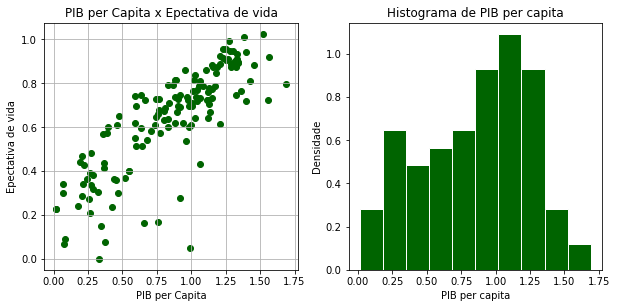

A covariância entre PIB per Capita e Expectativa de vida é: 0.0783
A correlação entre PIB per Capita e Expectativa de vida é: 0.8211


In [30]:
# gráfico de disperção PIB per Capita X Epectativa de vida
fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["GDP per Capita"],tabela_completa["Life Expectancy"],color="darkgreen")
plt.grid(True)
plt.xlabel("PIB per Capita")
plt.ylabel("Epectativa de vida")
plt.title("PIB per Capita x Epectativa de vida")

# Hisograma PIB per capita
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["GDP per Capita"], density=True, edgecolor="white",color="darkgreen");
plt.xlabel("PIB per capita")
plt.ylabel("Densidade")
plt.title("Histograma de PIB per capita");

plt.show()

# Correlação e covariância entre PIB per Capita e Epectativa de vida
cor_PIB = tabela_completa["Life Expectancy"].corr(tabela_completa["GDP per Capita"])
cov_PIB = tabela_completa["Life Expectancy"].cov(tabela_completa["GDP per Capita"])

print("A covariância entre PIB per Capita e Expectativa de vida é: {0}".format(round(cov_PIB,4)))
print("A correlação entre PIB per Capita e Expectativa de vida é: {0}".format(round(cor_PIB,4)))

### _3.5. Liberdade_

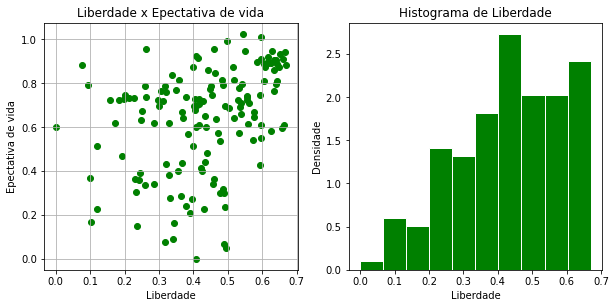

A covariância entre Liberdade e Expectativa de vida é: 0.0133
A correlação entre Liberdade e Expectativa de vida é: 0.3645


In [31]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Liberdade X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Freedom"],tabela_completa["Life Expectancy"],color="green")
plt.grid(True)
plt.xlabel("Liberdade")
plt.ylabel("Epectativa de vida")
plt.title("Liberdade x Epectativa de vida")

# Hisograma Pontuação de felicidade
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Freedom"], density=True, edgecolor="white",color="green");
plt.xlabel("Liberdade")
plt.ylabel("Densidade")
plt.title("Histograma de Liberdade");

plt.show()

# Correlação e covariância entre Liberdade e Epectativa de vida
cor_L = tabela_completa["Life Expectancy"].corr(tabela_completa["Freedom"])
cov_L = tabela_completa["Life Expectancy"].cov(tabela_completa["Freedom"])

print("A covariância entre Liberdade e Expectativa de vida é: {0}".format(round(cov_L,4)))
print("A correlação entre Liberdade e Expectativa de vida é: {0}".format(round(cor_L,4)))

### _3.6. Corrupção no governo (confiança)_

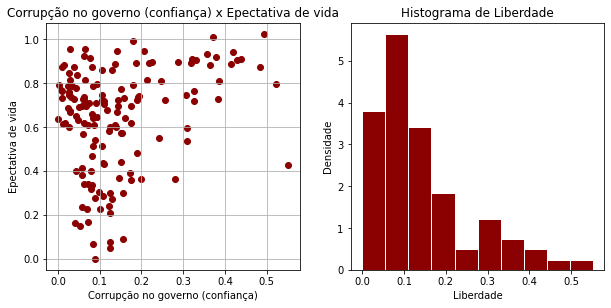

A covariância entre Corrupção no governo (confiança) e Expectativa de vida é: 0.0078
A correlação entre Corrupção no governo (confiança) e Expectativa de vida é: 0.2689


In [32]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Corrupção no governo (confiança) X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Government Corruption (Trust)"],tabela_completa["Life Expectancy"],color="darkred")
plt.grid(True)
plt.xlabel("Corrupção no governo (confiança)")
plt.ylabel("Epectativa de vida")
plt.title("Corrupção no governo (confiança) x Epectativa de vida")

# Hisograma Pontuação de felicidade
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Government Corruption (Trust)"], density=True, edgecolor="white",color="darkred");
plt.xlabel("Liberdade")
plt.ylabel("Densidade")
plt.title("Histograma de Liberdade");

plt.show()

# Correlação e covariância entre Liberdade e Epectativa de vida
cor_G = tabela_completa["Life Expectancy"].corr(tabela_completa["Government Corruption (Trust)"])
cov_G = tabela_completa["Life Expectancy"].cov(tabela_completa["Government Corruption (Trust)"])

print("A covariância entre Corrupção no governo (confiança) e Expectativa de vida é: {0}".format(round(cov_G,4)))
print("A correlação entre Corrupção no governo (confiança) e Expectativa de vida é: {0}".format(round(cor_G,4)))

### _3.7. Índice de percepção de corrupção_

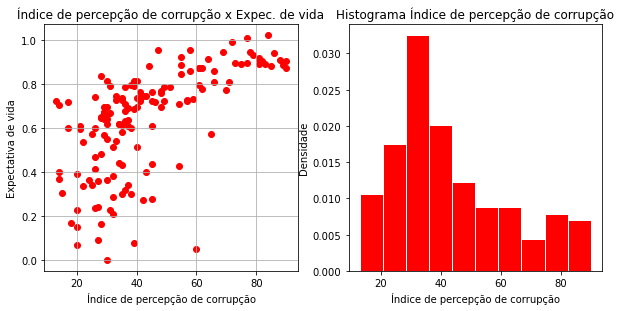

A covariância entre Índice de percepção de corrupção e expectativa de vida é: 2.9383
A correlação entre Índice de percepção de corrupção e expectativa de vida é: 0.6297


In [33]:
fig = plt.figure(figsize=(10,10))

# gráfico de disperção Índice de percepção de corrupção X Epectativa de vida
plt.subplot(2, 2, 1)
plt.scatter(tabela_completa["Corruption Perceptions Index (CPI)"],tabela_completa["Life Expectancy"],color="red")
plt.grid(True)
plt.xlabel("Índice de percepção de corrupção")
plt.ylabel("Expectativa de vida")
plt.title("Índice de percepção de corrupção x Expec. de vida")

# Hisograma Índice de percepção de corrupção
plt.subplot(2, 2, 2)
plt.hist(tabela_completa["Corruption Perceptions Index (CPI)"], density=True, edgecolor="white",color="red");
plt.xlabel("Índice de percepção de corrupção")
plt.ylabel("Densidade")
plt.title("Histograma Índice de percepção de corrupção");

plt.show()


# Correlação e covariância entre Índice de percepção de corrupção e Epectativa de vida
cor_COR = tabela_completa["Life Expectancy"].corr(tabela_completa["Corruption Perceptions Index (CPI)"])
cov_COR = tabela_completa["Life Expectancy"].cov(tabela_completa["Corruption Perceptions Index (CPI)"])

print("A covariância entre Índice de percepção de corrupção e expectativa de vida é: {0}".format(round(cov_COR,4)))
print("A correlação entre Índice de percepção de corrupção e expectativa de vida é: {0}".format(round(cor_COR,4)))

### _3.8. Expectativa de vida_

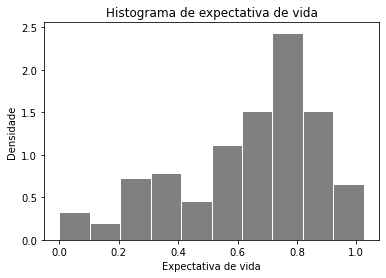

In [34]:
# Hisograma expectativa de vida (Variável a ser prevista)
plt.hist(tabela_completa["Life Expectancy"], density=True, edgecolor="white",color="grey");
plt.xlabel("Expectativa de vida")
plt.ylabel("Densidade")
plt.title("Histograma de expectativa de vida");

---

## _4. Implementação das técnicas de regressão_

In [35]:
# definição das variáveis independentes e da variável dependente
variavel_dependente = tabela_completa["Life Expectancy"]
variavel_independente = tabela_completa[["Corruption Perceptions Index (CPI)","GDP per Capita",
                                         "Happiness Score","Freedom","Happiness Rank","Government Corruption (Trust)",]]

# obtenção dos valores de treiamentos e valores de teste
X_train, X_test, y_train, y_test = train_test_split(variavel_independente, variavel_dependente, test_size=0.25, random_state=42)

### _4.1. Método de adição de constante_

(Descrever e justificar a escolha do primeiro modelo)

In [40]:
# criação da função que aplica a técnica de regressão linear
def regressao(v_explicativa, v_resposta):
    
    v_explicativa_cp = sm.add_constant(v_explicativa)
    
    model = sm.OLS(v_resposta,v_explicativa_cp)
    
    resultado = model.fit()
    
    return resultado

# utiliza a função "regressão" para aplicar o método
resultado = regressao(variavel_independente,variavel_dependente)

resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     56.74
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           3.29e-35
Time:                        14:52:40   Log-Likelihood:                 93.584
No. Observations:                 148   AIC:                            -173.2
Df Residuals:                     141   BIC:                            -152.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.9946      0.570      1.746      0.083      -0.132       2.121
Corruption Perceptions Index (CPI)     0.0018      0.001      2.006      0.047    2.66e-05       0.004
GDP per Capita                         0.3437      0.050      6.917      0.000       0.245       0.442
Happiness Score                       -0.0835      0.078     -1.067      0.288      -0.238       0.071
Freedom                               -0.0048      0.097     -0.050      0.960      -0.196       0.187
Happiness Rank                        -0.0032      0.002     -1.653      0.101      -0.007       0.001
Government Corruption (Trust)         -0.1641      0.111     -1.472      0.143      -0.384       0.056
==============================================================================
Omnibus:                       47.193   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.890
Skew:                          -1.292   Prob(JB):                     5.61e-27
Kurtosis:                       6.595   Cond. No.                     5.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
regressao_linear = LinearRegression().fit(X_train, y_train)

# 
previsao1 = regressao_linear.predict(X_test)

# calcula o erro absoluto
errors =  abs(previsao1 - y_test)

# Printa os resultados
print('Média de erro absoluto:', round(np.mean(errors), 4), '.')
print( "Erro quadrático médio entre Y_test e y_pred: {0} .".format(round(mean_squared_error(y_test, previsao1),4)) )
print("Correlação entre Y_test e Y_pred: {0} .".format(round(r2_score(y_test, previsao1),4)))

Média de erro absoluto: 0.0984 .
Erro quadrático médio entre Y_test e y_pred: 0.0248 .
Correlação entre Y_test e Y_pred: 0.6096 .


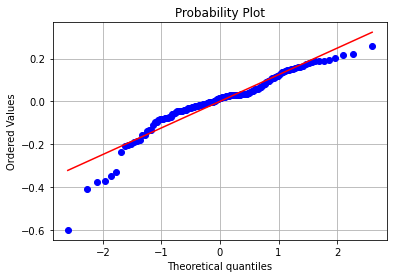

In [38]:
stats.probplot(resultado.resid, dist='norm', plot=plt);
plt.grid(True)

### _4.2. Regressão Random Forest_

(Descrever e justificar a escolha do segundo modelo)

In [39]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
previsao2 = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(previsao2 - y_test)

# Print out the mean absolute error 
print('Média de erro absoluto:', round(np.mean(errors), 4), '.')
print( "Erro quadrático médio entre Y_test e y_pred: {0} .".format(round(mean_squared_error(y_test, previsao2),4)) )
print("Correlação entre Y_test e Y_pred: {0} .".format(round(r2_score(y_test, previsao2),4)))

Média de erro absoluto: 0.1003 .
Erro quadrático médio entre Y_test e y_pred: 0.0261 .
Correlação entre Y_test e Y_pred: 0.589 .


### 5. Conclusão ###

Em suma, pudemos observar que dos tres métodos utilizados de regressão (Método de adição de constante, linear regression e random forrest regression), o mais preciso no caso do nosso projeto foi o "método de adição de constante", enquanto o método com menos precisão foi o "random forrest regression".